In [1]:
"""
Imports de librairies
"""
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import numpy as np
import math
import scipy.stats
import random 
import scipy
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [ ]:
"""
Spec des fichiers :
    h1 is the household of member 1; h1=[L, F, E, B, H]
    m1 is the anonymous ID number of member 1;
    h2 is the household of member 2; h2=[L, F, E, B, H]
    m2 is the anonymous ID number of member 2;
    age1 is the age of member 1; age1 = [0, 1, 2, 3, 4]
    age2 is the age of member 2; age2 = [0, 1, 2, 3, 4]
    sex1 is the gender of member 1; sex1 = [F, M]
    sex2 is the gender of member 2; sex2 = [F, M]
    duration is the duration of the contact event in seconds;
    day is the day of experiment; day = [1, 2, 3]
    hour is the day time of the contact event; hour = [7 – 20]

Variables Dictionary
========

Households.
There are 5 households in the dataset. They are labelled as L, F, E, B and H, by increasing size.
Members of households L, F and E wore the sensors during overlapping time windows.

Age.
Membersâ€™ age is indicated with numbers from 0 to 4 corresponding the following age brackets:
0 - from 0 to 5 years old;
1 - from 6 to 14 years old;
2 - from 15 to 19 years old;
3 - from 20 to 49 years old;
4 - 50 and older.

Day of experiment.
Contact data has been collected over three consecutive days for each household that are indicated as Day 1, Day 2, Day 3 and correspond to:
L = [25/04/2012, 26/04/2012, 27/04/2012]
F = [26/04/2012, 27/04/2012, 28/04/2012]
E = [27/04/2012, 28/04/2012, 29/04/2012]
B = [03/05/2012, 04/05/2012, 05/05/2012]
H = [09/05/2012, 10/05/2012, 11/05/2012]

Hour.
Only contact events recorded between 6am and 8pm are reported.
Hours are indicated by integers corresponding to the end of the time interval:
- 7 = from 6am to 7am
- 8 = from 7am to 8am
â€¦
- 20 = from 7pm to 8pm

"""

In [11]:
"""
import d'un csv
"""
data_1 = pd.read_csv("scc2034_kilifi_all_contacts_within_households.csv", sep=",", header=0)
data_2 = pd.read_csv("scc2034_kilifi_all_contacts_across_households.csv", sep=",", header=0)

data_1.columns = ['Maison1_1', 'ID1_1','Maison2_1', 'ID2_1','age1_1', 'age2_1', 'genre1_1', 'genre2_1', 'duration_1', 'day_1', 'hour_1']
data_2.columns = ['Maison1_2', 'ID1_2','Maison2_2', 'ID2_2','age1_2', 'age2_2', 'genre1_2', 'genre2_2', 'duration_2', 'day_2', 'hour_2']
data_1

,Maison1_1,ID1_1,Maison2_1,ID2_1,age1_1,age2_1,genre1_1,genre2_1,duration_1,day_1,hour_1
0,E,2,E,4,0,1,M,M,20,1,12
1,E,2,E,4,0,1,M,M,40,1,12
2,E,2,E,4,0,1,M,M,20,1,9
3,E,2,E,4,0,1,M,M,20,1,12
4,E,2,E,4,0,1,M,M,40,1,9
...,...,...,...,...,...,...,...,...,...,...,...
32420,B,58,B,8,1,1,F,F,20,3,17
32421,B,58,B,8,1,1,F,F,20,3,17
32422,B,58,B,8,1,1,F,F,20,3,17
32423,B,58,B,8,1,1,F,F,20,3,17


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

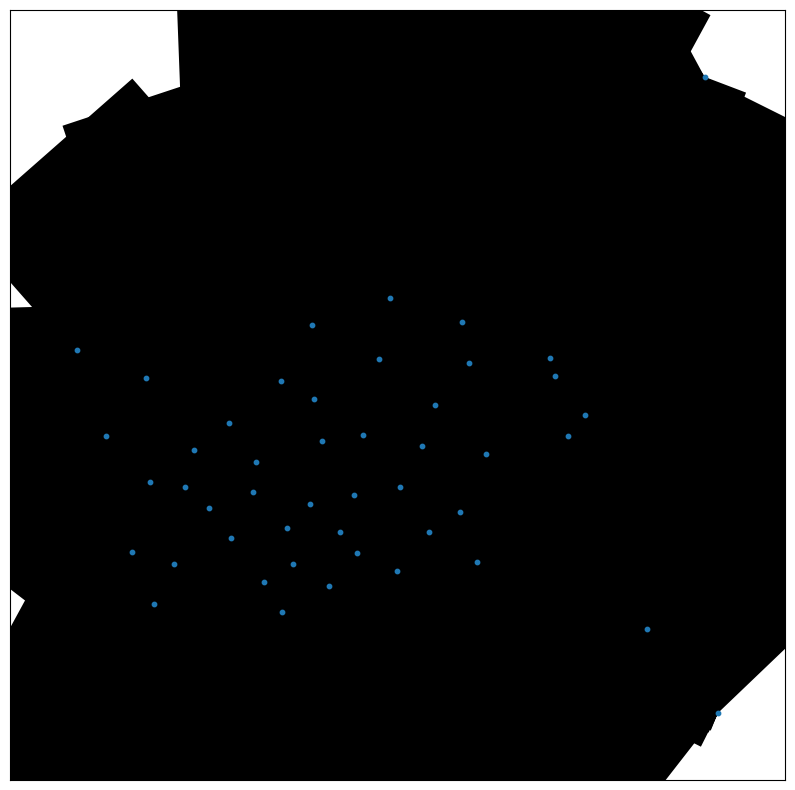

In [113]:
"""
représentation du dataset
"""
# Create a graph
G = nx.Graph()

# Add nodes and weighted edges based on the number of contacts (row count)
for index, row in data_1.iterrows():
    G.add_node(row['ID1_1'])
    G.add_node(row['ID2_1'])
    contact_count = 1  # Count each contact as 1
    if G.has_edge(row['ID1_1'], row['ID2_1']):
        G[row['ID1_1']][row['ID2_1']]['weight'] += contact_count
    else:
        G.add_edge(row['ID1_1'], row['ID2_1'], weight=contact_count)

# Extract edge weights into a list
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Create a layout for the nodes (e.g., Kamada-Kawai layout)
pos = nx.kamada_kawai_layout(G)

# Set the figure size
plt.figure(figsize=(10, 10))  # You can adjust the size as needed

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=10)

# Draw edges with varying thickness based on weights
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_cmap=plt.cm.Blues, edge_vmin=min(edge_weights), edge_vmax=max(edge_weights))

# Create a colorbar for the edge thickness
cbar = plt.colorbar()
cbar.set_label('Edge Weight (Number of Contacts)')

# Show the graph
plt.axis('off')
plt.show()

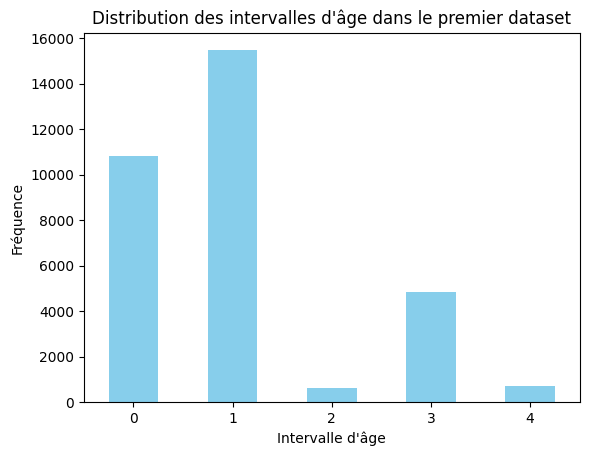

In [92]:
# Sélectionnez la colonne 'age1_1' du premier dataset
age_intervals = data_1['age1_1']

# Comptez le nombre d'occurrences de chaque intervalle
age_interval_counts = age_intervals.value_counts()

# Triez les intervalles par ordre croissant
age_interval_counts = age_interval_counts.sort_index()

# Créez un graphique à barres
age_interval_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution des intervalles d'âge dans le premier dataset")
plt.xlabel("Intervalle d'âge")
plt.ylabel("Fréquence")
plt.xticks(rotation=0)  # Pour faire pivoter les étiquettes de l'axe x
plt.show()

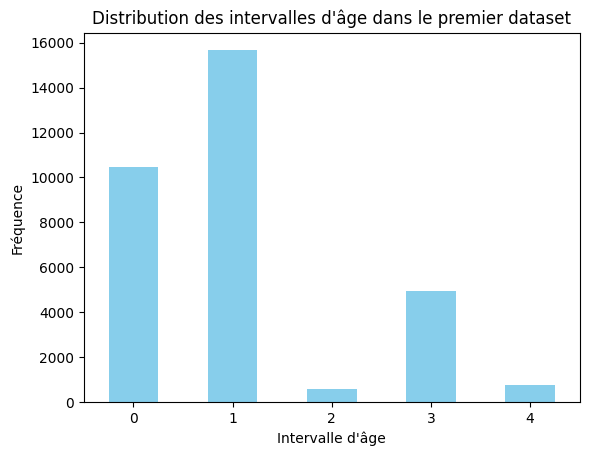

In [63]:
# Sélectionnez la colonne 'age1_1' du premier dataset
age_intervals = data_1['age2_1']

# Comptez le nombre d'occurrences de chaque intervalle
age_interval_counts = age_intervals.value_counts()

# Triez les intervalles par ordre croissant
age_interval_counts = age_interval_counts.sort_index()

# Créez un graphique à barres
age_interval_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution des intervalles d'âge dans le premier dataset")
plt.xlabel("Intervalle d'âge")
plt.ylabel("Fréquence")
plt.xticks(rotation=0)  # Pour faire pivoter les étiquettes de l'axe x
plt.show()

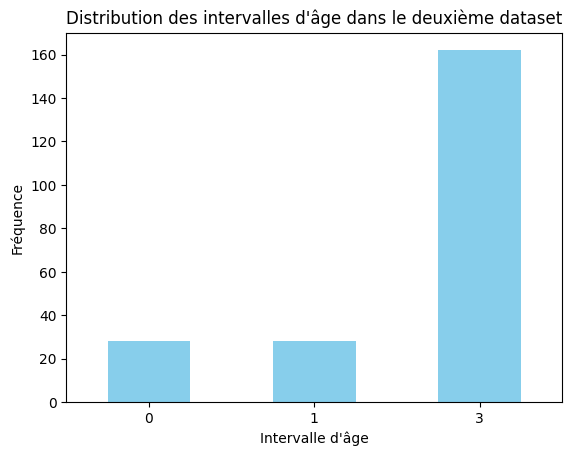

In [102]:
# Sélectionnez la colonne 'age1_1' du deuxième dataset
age_intervals = data_2['age1_2']

# Comptez le nombre d'occurrences de chaque intervalle
age_interval_counts = age_intervals.value_counts()

# Triez les intervalles par ordre croissant
age_interval_counts = age_interval_counts.sort_index()

# Créez un graphique à barres
age_interval_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution des intervalles d'âge dans le deuxième dataset")
plt.xlabel("Intervalle d'âge")
plt.ylabel("Fréquence")
plt.xticks(rotation=0)  # Pour faire pivoter les étiquettes de l'axe x
plt.show()

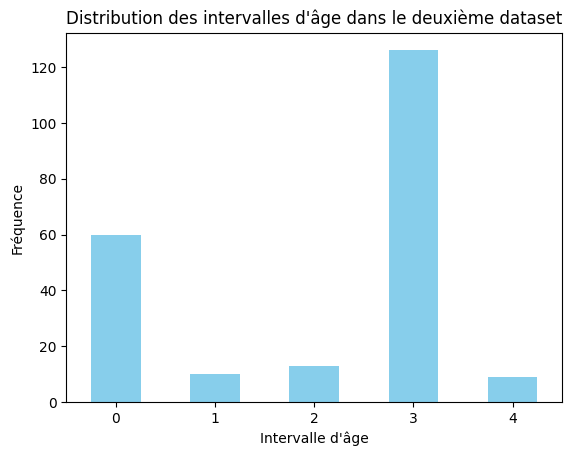

In [100]:
# Sélectionnez la colonne 'age1_1' du deuxième dataset
age_intervals = data_2['age2_2']

# Comptez le nombre d'occurrences de chaque intervalle
age_interval_counts = age_intervals.value_counts()

# Triez les intervalles par ordre croissant
age_interval_counts = age_interval_counts.sort_index()

# Créez un graphique à barres
age_interval_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution des intervalles d'âge dans le deuxième dataset")
plt.xlabel("Intervalle d'âge")
plt.ylabel("Fréquence")
plt.xticks(rotation=0)  # Pour faire pivoter les étiquettes de l'axe x
plt.show()

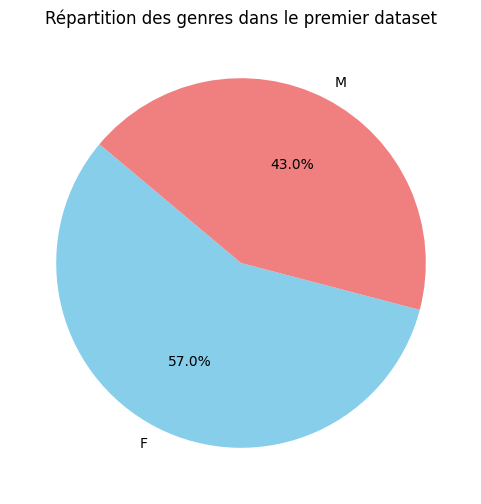

In [111]:
# Sélectionnez la colonne 'genre1_1' du premier dataset
gender_counts = data_1['genre1_1'].value_counts()

# Créez un graphique à secteurs
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Répartition des genres dans le premier dataset")
plt.show()

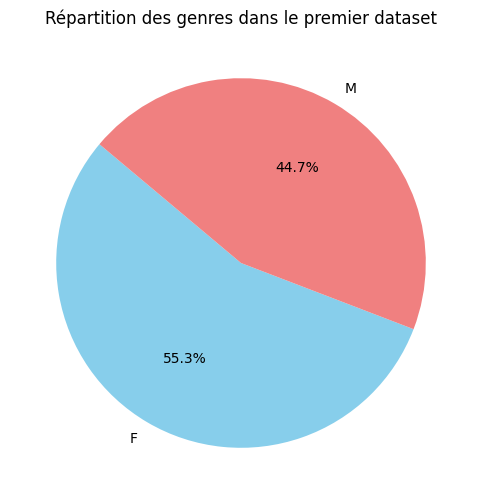

In [112]:
# Sélectionnez la colonne 'genre1_1' du premier dataset
gender_counts = data_1['genre2_1'].value_counts()

# Créez un graphique à secteurs
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Répartition des genres dans le premier dataset")
plt.show()

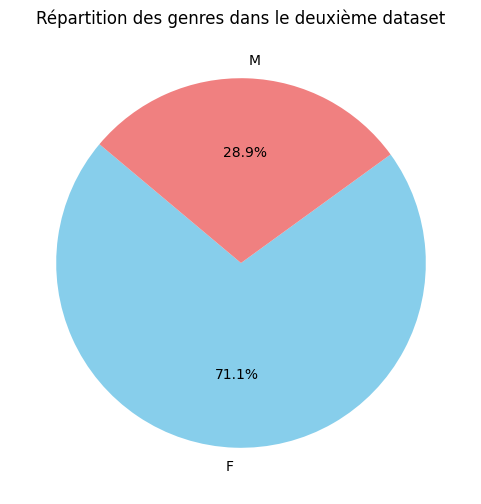

In [115]:
# Sélectionnez la colonne 'genre1_1' du premier dataset
gender_counts = data_2['genre1_2'].value_counts()

# Créez un graphique à secteurs
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Répartition des genres dans le deuxième dataset")
plt.show()

In [ ]:
# Sélectionnez la colonne 'genre1_1' du premier dataset
gender_counts = data_2['genre2_1'].value_counts()

# Créez un graphique à secteurs
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Répartition des genres dans le premier dataset")
plt.show()